# Tensorflow Tutorial on TFRecord

Original link:  https://github.com/tensorflow/models/blob/master/research/object_detection/dataset_tools/create_coco_tf_record.py

In [1]:
# import packages and scripts
from tfrecords import create_tf_example

import json
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

According to the documentation, I need the following: 
- image: dict with keys: [u'license', u'file_name', u'coco_url', u'height', u'width', u'date_captured', u'flickr_url', u'id']
- annotations_list: list of dicts with keys: [u'segmentation', u'area', u'iscrowd', u'image_id', u'bbox', u'category_id', u'id']

In [2]:
# upload json file to dataframe
f = open('data/cleaned_coco_export_with_segmentation.json')
data = json.load(f)
df = pd.DataFrame.from_dict(data)
df.head()

,file_name,height,width,segmentation,category_id,bbox,xmin,ymin,xwidth,yheight
0,/content/drive/My Drive/school/11101303.png,250,250,"[[174.385, 109.891, 124.584, 203.318, 198.668,...",0,"[124.584, 109.891, 130.058, 133.35000000000002]",124.584,109.891,130.058,133.35000000000002
1,/content/drive/My Drive/school/11101304.png,250,250,"[[0.749, 71.86, 128.998, 67.368, 112.031, 130....",0,"[0.0, 67.368, 128.998, 63.37700000000001]",0.000,67.368,128.998,63.37700000000001
2,/content/drive/My Drive/school/11101306.png,250,250,"[[0, 21.957, 117.52, 72.858, 77.598, 153.201, ...",0,"[0.0, 21.957, 117.52, 131.244]",0.000,21.957,117.52,131.244
3,/content/drive/My Drive/school/11102313.png,250,250,"[[122.511, 54.394, 47.158, 164.678, 173.91, 24...",0,"[47.158, 54.394, 199.61, 195.119]",47.158,54.394,199.61,195.119
4,/content/drive/My Drive/school/11102314.png,250,250,"[[83.587, 192.125, 148.959, 137.731, 50.152, 2...",0,"[2.246, 25.45, 146.713, 166.675]",2.246,25.450,146.713,166.675


In [3]:
# explore json file
data

[{'file_name': '/content/drive/My Drive/school/11101303.png',
  'height': 250,
  'width': 250,
  'segmentation': '[[174.385, 109.891, 124.584, 203.318, 198.668, 243.241, 254.642, 152.283]]',
  'category_id': 0,
  'bbox': '[124.584, 109.891, 130.058, 133.35000000000002]',
  'xmin': 124.584,
  'ymin': 109.891,
  'xwidth': '130.058',
  'yheight': '133.35000000000002'},
 {'file_name': '/content/drive/My Drive/school/11101304.png',
  'height': 250,
  'width': 250,
  'segmentation': '[[0.749, 71.86, 128.998, 67.368, 112.031, 130.745, 0, 125.255]]',
  'category_id': 0,
  'bbox': '[0.0, 67.368, 128.998, 63.37700000000001]',
  'xmin': 0,
  'ymin': 67.368,
  'xwidth': '128.998',
  'yheight': '63.37700000000001'},
 {'file_name': '/content/drive/My Drive/school/11101306.png',
  'height': 250,
  'width': 250,
  'segmentation': '[[0, 21.957, 117.52, 72.858, 77.598, 153.201, 0.25, 119.766]]',
  'category_id': 0,
  'bbox': '[0.0, 21.957, 117.52, 131.244]',
  'xmin': 0,
  'ymin': 21.957,
  'xwidth': '1

In [4]:
# add id columns
df['id'] = df.index + 1
df['image_id'] = df.index + 1
df.head()

,file_name,height,width,segmentation,category_id,bbox,xmin,ymin,xwidth,yheight,id,image_id
0,/content/drive/My Drive/school/11101303.png,250,250,"[[174.385, 109.891, 124.584, 203.318, 198.668,...",0,"[124.584, 109.891, 130.058, 133.35000000000002]",124.584,109.891,130.058,133.35000000000002,1,1
1,/content/drive/My Drive/school/11101304.png,250,250,"[[0.749, 71.86, 128.998, 67.368, 112.031, 130....",0,"[0.0, 67.368, 128.998, 63.37700000000001]",0.000,67.368,128.998,63.37700000000001,2,2
2,/content/drive/My Drive/school/11101306.png,250,250,"[[0, 21.957, 117.52, 72.858, 77.598, 153.201, ...",0,"[0.0, 21.957, 117.52, 131.244]",0.000,21.957,117.52,131.244,3,3
3,/content/drive/My Drive/school/11102313.png,250,250,"[[122.511, 54.394, 47.158, 164.678, 173.91, 24...",0,"[47.158, 54.394, 199.61, 195.119]",47.158,54.394,199.61,195.119,4,4
4,/content/drive/My Drive/school/11102314.png,250,250,"[[83.587, 192.125, 148.959, 137.731, 50.152, 2...",0,"[2.246, 25.45, 146.713, 166.675]",2.246,25.450,146.713,166.675,5,5


In [5]:
# test extracting filename
df.file_name[0][-12:]

'11101303.png'

In [6]:
# extract filename in column
df.file_name = df.file_name.apply(lambda x: x[-12:])
df.head()

,file_name,height,width,segmentation,category_id,bbox,xmin,ymin,xwidth,yheight,id,image_id
0,11101303.png,250,250,"[[174.385, 109.891, 124.584, 203.318, 198.668,...",0,"[124.584, 109.891, 130.058, 133.35000000000002]",124.584,109.891,130.058,133.35000000000002,1,1
1,11101304.png,250,250,"[[0.749, 71.86, 128.998, 67.368, 112.031, 130....",0,"[0.0, 67.368, 128.998, 63.37700000000001]",0.000,67.368,128.998,63.37700000000001,2,2
2,11101306.png,250,250,"[[0, 21.957, 117.52, 72.858, 77.598, 153.201, ...",0,"[0.0, 21.957, 117.52, 131.244]",0.000,21.957,117.52,131.244,3,3
3,11102313.png,250,250,"[[122.511, 54.394, 47.158, 164.678, 173.91, 24...",0,"[47.158, 54.394, 199.61, 195.119]",47.158,54.394,199.61,195.119,4,4
4,11102314.png,250,250,"[[83.587, 192.125, 148.959, 137.731, 50.152, 2...",0,"[2.246, 25.45, 146.713, 166.675]",2.246,25.450,146.713,166.675,5,5


In [7]:
 # make sure all the filenames are the same length
df.tail()

,file_name,height,width,segmentation,category_id,bbox,xmin,ymin,xwidth,yheight,id,image_id
5609,52511304.png,250,250,"[[39.074, 124.121, 53.772, 199.656, 154.621, 1...",0,"[39.074, 98.807, 115.54700000000001, 100.849]",39.074,98.807,115.54700000000001,100.849,5610,5610
5610,52511305.png,250,250,"[[194.633, 122.488, 179.527, 43.279, 59.488, 6...",0,"[59.488, 43.279, 135.145, 106.97300000000001]",59.488,43.279,135.145,106.97300000000001,5611,5611
5611,52511317.png,250,250,"[[74.595, 7.349, 118.283, 162.501, 228.522, 13...",0,"[74.595, 4.491, 153.927, 158.01]",74.595,4.491,153.927,158.01,5612,5612
5612,52512301.png,250,250,"[[66.429, 256, 46.423, 102.073, 184.834, 91.45...",0,"[46.423, 91.458, 138.411, 164.542]",46.423,91.458,138.411,164.542,5613,5613
5613,52512302.png,250,250,"[[95.01, 88.6, 103.992, 163.726, 208.515, 146....",0,"[95.01, 71.451, 113.50499999999998, 92.275]",95.010,71.451,113.50499999999998,92.275,5614,5614


In [8]:
# look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5614 entries, 0 to 5613
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   file_name     5614 non-null   object 
 1   height        5614 non-null   int64  
 2   width         5614 non-null   int64  
 3   segmentation  5614 non-null   object 
 4   category_id   5614 non-null   int64  
 5   bbox          5614 non-null   object 
 6   xmin          5614 non-null   float64
 7   ymin          5614 non-null   float64
 8   xwidth        5614 non-null   object 
 9   yheight       5614 non-null   object 
 10  id            5614 non-null   int64  
 11  image_id      5614 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 526.4+ KB


In [9]:
# convert to float
df.xwidth = df.xwidth.astype(np.float64)
df.yheight = df.yheight.astype(np.float64)

In [10]:
# testing code on creating bbox
df.loc[0, 'xmin': 'yheight'].tolist()

[124.584, 109.891, 130.058, 133.35000000000002]

In [11]:
# apply code to entire column
for i in range(5614):
    df['bbox'][i] = df.loc[i, 'xmin': 'yheight'].tolist()

In [13]:
# see instance of segmentation value
df.segmentation[0]

'[[174.385, 109.891, 124.584, 203.318, 198.668, 243.241, 254.642, 152.283]]'

In [14]:
# remove brackets
df.segmentation[0][2:-2]

'174.385, 109.891, 124.584, 203.318, 198.668, 243.241, 254.642, 152.283'

In [15]:
# split string on commas and remove whitespace
df.segmentation[0][2:-2].replace(" ", "").split(",")

['174.385',
 '109.891',
 '124.584',
 '203.318',
 '198.668',
 '243.241',
 '254.642',
 '152.283']

In [16]:
# turn strings into floats and restore double brackets
float_list = [[float(item) for item in df.segmentation[0][2:-2].replace(" ", "").split(",")]]
float_list

[[174.385, 109.891, 124.584, 203.318, 198.668, 243.241, 254.642, 152.283]]

In [17]:
# apply code to column
df.segmentation = df.segmentation.apply(lambda x: [[float(item) for item in x[2:-2].replace(" ", "").split(",")]])

In [30]:
# calculate area
df['area'] = abs(df.xwidth - df.xmin) * abs(df.yheight - df.ymin)
df.head()

,file_name,height,width,segmentation,category_id,bbox,xmin,ymin,xwidth,yheight,id,image_id,area
0,11101303.png,250,250,"[[174.385, 109.891, 124.584, 203.318, 198.668,...",0,"[124.584, 109.891, 130.058, 133.35000000000002]",124.584,109.891,130.058,133.350,1,1,128.414566
1,11101304.png,250,250,"[[0.749, 71.86, 128.998, 67.368, 112.031, 130....",0,"[0.0, 67.368, 128.998, 63.37700000000001]",0.000,67.368,128.998,63.377,2,2,514.831018
2,11101306.png,250,250,"[[0.0, 21.957, 117.52, 72.858, 77.598, 153.201...",0,"[0.0, 21.957, 117.52, 131.244]",0.000,21.957,117.520,131.244,3,3,12843.408240
3,11102313.png,250,250,"[[122.511, 54.394, 47.158, 164.678, 173.91, 24...",0,"[47.158, 54.394, 199.61, 195.119]",47.158,54.394,199.610,195.119,4,4,21453.807700
4,11102314.png,250,250,"[[83.587, 192.125, 148.959, 137.731, 50.152, 2...",0,"[2.246, 25.45, 146.713, 166.675]",2.246,25.450,146.713,166.675,5,5,20402.352075


**image:**
- dict with keys: [u'license', u'file_name', u'coco_url', u'height', u'width', u'date_captured', u'flickr_url', u'id']


**annotations_list:**
- list of dicts with keys: [u'segmentation', u'area', u'iscrowd', u'image_id', u'bbox', u'category_id', u'id']

In [35]:
# create image dataframe and fill in missing values
image = df[['file_name', 'height', 'width', 'id']]
image['license'] = None
image['coco_url'] = None
image['date_captured'] = None
image['flickr_url'] = None
image.head()

,file_name,height,width,id,license,coco_url,date_captured,flickr_url
0,11101303.png,250,250,1,None,None,None,None
1,11101304.png,250,250,2,None,None,None,None
2,11101306.png,250,250,3,None,None,None,None
3,11102313.png,250,250,4,None,None,None,None
4,11102314.png,250,250,5,None,None,None,None


In [36]:
# convert dataframe to dictionary
imageDict = image.to_dict('index')
imageDict

{0: {'file_name': '11101303.png',
  'height': 250,
  'width': 250,
  'id': 1,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 1: {'file_name': '11101304.png',
  'height': 250,
  'width': 250,
  'id': 2,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 2: {'file_name': '11101306.png',
  'height': 250,
  'width': 250,
  'id': 3,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 3: {'file_name': '11102313.png',
  'height': 250,
  'width': 250,
  'id': 4,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 4: {'file_name': '11102314.png',
  'height': 250,
  'width': 250,
  'id': 5,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 5: {'file_name': '11102315.png',
  'height': 250,
  'width': 250,
  'id': 6,
  'license': None,
  'coco_url': None,
  'date_captured': None,
  'flickr_url': None},
 6: {'file

In [42]:
# grab just the values of dictionary
image_values = list(imageDict.values())

In [32]:
# create annotations dataframe
annotations_list = df[['segmentation', 'bbox', 'category_id', 'id', 'image_id', 'area']]
annotations_list['iscrowd'] = 0
annotations_list.head()

,segmentation,bbox,category_id,id,image_id,area,iscrowd
0,"[[174.385, 109.891, 124.584, 203.318, 198.668,...","[124.584, 109.891, 130.058, 133.35000000000002]",0,1,1,128.414566,0
1,"[[0.749, 71.86, 128.998, 67.368, 112.031, 130....","[0.0, 67.368, 128.998, 63.37700000000001]",0,2,2,514.831018,0
2,"[[0.0, 21.957, 117.52, 72.858, 77.598, 153.201...","[0.0, 21.957, 117.52, 131.244]",0,3,3,12843.408240,0
3,"[[122.511, 54.394, 47.158, 164.678, 173.91, 24...","[47.158, 54.394, 199.61, 195.119]",0,4,4,21453.807700,0
4,"[[83.587, 192.125, 148.959, 137.731, 50.152, 2...","[2.246, 25.45, 146.713, 166.675]",0,5,5,20402.352075,0


In [37]:
# convert to dictionary
annotationsDict = annotations_list.to_dict('index')
annotationsDict

{0: {'segmentation': [[174.385,
    109.891,
    124.584,
    203.318,
    198.668,
    243.241,
    254.642,
    152.283]],
  'bbox': [124.584, 109.891, 130.058, 133.35000000000002],
  'category_id': 0,
  'id': 1,
  'image_id': 1,
  'area': 128.41456599999984,
  'iscrowd': 0},
 1: {'segmentation': [[0.749,
    71.86,
    128.998,
    67.368,
    112.031,
    130.745,
    0.0,
    125.255]],
  'bbox': [0.0, 67.368, 128.998, 63.37700000000001],
  'category_id': 0,
  'id': 2,
  'image_id': 2,
  'area': 514.831017999998,
  'iscrowd': 0},
 2: {'segmentation': [[0.0,
    21.957,
    117.52,
    72.858,
    77.598,
    153.201,
    0.25,
    119.766]],
  'bbox': [0.0, 21.957, 117.52, 131.244],
  'category_id': 0,
  'id': 3,
  'image_id': 3,
  'area': 12843.40824,
  'iscrowd': 0},
 3: {'segmentation': [[122.511,
    54.394,
    47.158,
    164.678,
    173.91,
    249.513,
    246.768,
    142.222]],
  'bbox': [47.158, 54.394, 199.61, 195.119],
  'category_id': 0,
  'id': 4,
  'image_id': 4,


In [41]:
# grab just the values of dictionary
annotations_values = list(annotationsDict.values())
annotations_values[0]

{'segmentation': [[174.385,
   109.891,
   124.584,
   203.318,
   198.668,
   243.241,
   254.642,
   152.283]],
 'bbox': [124.584, 109.891, 130.058, 133.35000000000002],
 'category_id': 0,
 'id': 1,
 'image_id': 1,
 'area': 128.41456599999984,
 'iscrowd': 0}

In [52]:
# create third dataframe
category_index = df[['id']]
category_index['name'] = 'school'
category_index['supercategory'] = None
category_index['id'] = 0

In [53]:
# create dictionary close to COCO JSON format
categoryDict = category_index.to_dict('index')
category_values = list(categoryDict.values())
category_dict = {"categories": category_values}
image_dict = {"images": image_values}
annotations_dict = {"annotations": annotations_values}
school_dict = {"categories": category_values, 
               "images": image_values, 
               "annotations": annotations_values}

In [56]:
# save dictionary to json format to disk
with open("data/annotations/annotations.json", "w") as outfile:
    json.dump(school_dict, outfile)

In [48]:
key, example = create_tf_example(image=image_dict,
                  annotations_list=annotations_dict,
                  image_dir="Giga/datasets/images/school",
                  category_index=category_dict)

KeyError: 'height'

# Keras recipe for creating TFRecords

In [50]:
# import dependencies2
import os
import json
import pprint
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
# assign folders
root_dir = "data"
tfrecords_dir = "tfrecords"
images_dir = os.path.join(root_dir, "school")
annotations_dir = os.path.join(root_dir, "annotations")
annotation_file = os.path.join(annotations_dir, "annotations.json")

# upload annotations portion of json file
with open(annotation_file, "r") as f:
    annotations = json.load(f)["annotations"]

print(f"Number of images: {len(annotations)}")

Number of images: 5614


In [65]:
# upload images portion of json file for file_name
with open(annotation_file, "r") as f:
    images = json.load(f)["images"]

len(images)

5614

In [80]:
# merge the two dictionaries together into one
total = []
for i in range(len(annotations)):
    d = {}
    d.update(annotations[i])
    d.update(images[i])
    total.append(d)

In [82]:
# pretty print instance of total
pprint.pprint(total[60])

{'area': 7351.14501,
 'bbox': [50.152, 70.862, 142.22199999999998, 150.705],
 'category_id': 0,
 'coco_url': None,
 'date_captured': None,
 'file_name': '11302312.png',
 'flickr_url': None,
 'height': 250,
 'id': 61,
 'image_id': 61,
 'iscrowd': 0,
 'license': None,
 'segmentation': [[63.127,
                   70.862,
                   192.374,
                   77.349,
                   178.402,
                   216.078,
                   50.152,
                   221.567]],
 'width': 250}


## Parameters

In [95]:
# set parameters
num_samples = 1 # number of data samples on each TFRecord file
num_tfrecords = len(total) // num_samples # total number of TFRecords we will create
if len(total) % num_samples:
    num_tfrecords += 1  # add one record if there are any remaining samples

if not os.path.exists(tfrecords_dir):
    os.makedirs(tfrecords_dir)  # creating TFRecords output folder

## Helper Functions

In [96]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_png(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))


def create_example(image, path, example):
    feature = {
        "image": image_feature(image),
        "path": bytes_feature(path),
        "area": float_feature(example["area"]),
        "bbox": float_feature_list(example["bbox"]),
        "category_id": int64_feature(example["category_id"]),
        "id": int64_feature(example["id"]),
        "image_id": int64_feature(example["image_id"]),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "area": tf.io.FixedLenFeature([], tf.float32),
        "bbox": tf.io.VarLenFeature(tf.float32),
        "category_id": tf.io.FixedLenFeature([], tf.int64),
        "id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_png(example["image"], channels=3)
    example["bbox"] = tf.sparse.to_dense(example["bbox"])
    return example

## Generating Data in TFRecord Format

There are some images that were not converted to TFRecord format, so I skipped the image.  The TFRecords are created in sequential order to allow for skipping of the file in `range(x, num_tfrecords)` and do not refer to the actual filename.

In [104]:
for tfrec_num in range(4648, num_tfrecords):
    samples = total[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)]

    with tf.io.TFRecordWriter(
        tfrecords_dir + "/file_%.2i-%i.tfrec" % (tfrec_num, len(samples))
    ) as writer:
        for sample in samples:
            image_path = f"{images_dir}/{sample['file_name']}"
            image = tf.io.decode_png(tf.io.read_file(image_path))
            example = create_example(image, image_path, sample)
            writer.write(example.SerializeToString())

# Exploring sample TFRecord

bbox: [124.584 109.891 130.058 133.35 ]
area: 128.41456604003906
category_id: 0
id: 1
image_id: 1
path: b'data/school/11101303.png'
Image shape: (256, 256, 3)


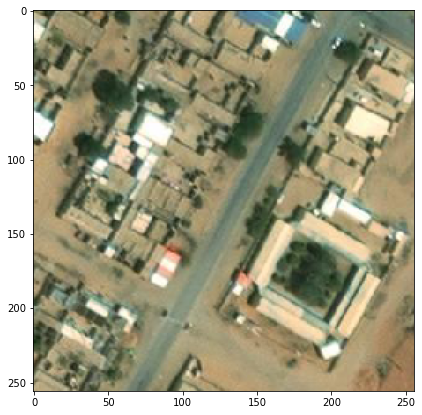

In [93]:
raw_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir}/file_00-{num_samples}.tfrec")
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(1):
    for key in features.keys():
        if key != "image":
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()